In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np


sys.path.append("../src")


from plots_functions import (
    multiple_runs_with_uncertainty_band,
    multiple_runs_with_every_run,
)

In [20]:
experiment_dict = pickle.load(open("../results/general_parameters.pkl", "rb"))

for key, value in experiment_dict.items():
    print(f"key: {key}, value: {value}")

key: experiment name, value: general_parameters
key: experiments metadata, value: 
key: (10, 0.01), value: ([{'train_loss': [2.0194053649902344, 1.612028956413269, 1.4679303169250488, 1.3997058868408203, 1.3593603372573853, 1.323898434638977, 1.3058810234069824, 1.2873228788375854, 1.2756797075271606, 1.2682218551635742, 1.2647629976272583, 1.2561184167861938, 1.2496393918991089, 1.2419946193695068, 1.2435681819915771, 1.2388033866882324, 1.2400380373001099, 1.2342959642410278, 1.2293808460235596, 1.2281365394592285, 1.2256735563278198, 1.2187484502792358, 1.2243200540542603, 1.2209519147872925, 1.217237114906311, 1.2146869897842407, 1.2164839506149292, 1.2111546993255615, 1.2115225791931152, 1.2114430665969849], 'train_acc': [24.213752665245202, 40.64387882018479, 46.63068585643212, 49.2137526652452, 50.714063610518835, 51.98227611940298, 52.70966595593461, 53.38264036958067, 53.87571073205402, 54.229966240227434, 54.46539623312012, 54.61975835110164, 54.938477256574274, 55.1350390902

### Focus on time it took

Text(0.5, 1.0, 'Time taken for each run configuration for Baseline model')

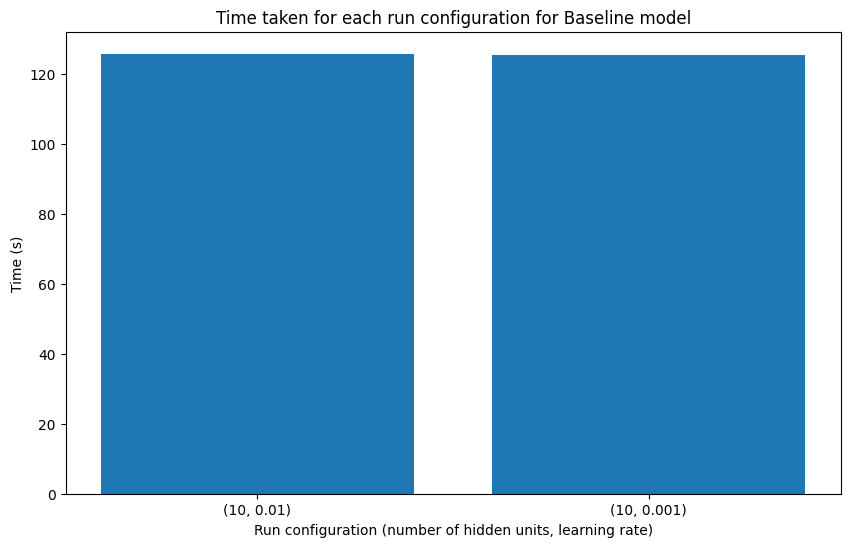

In [31]:
run_keys = []
time_values = []
number_of_parameters = []
for key, value in experiment_dict.items():
    if isinstance(value, tuple):
        run_keys.append(str(key))
        time_values.append(sum(value[1]) / len(value[1]))
        number_of_parameters.append(value[2])

# bar plot of time values
plt.figure(figsize=(10, 6))
plt.bar(run_keys, time_values)
plt.xlabel("Run configuration (number of hidden units, learning rate)")
plt.ylabel("Time (s)")
plt.title("Time taken for each run configuration for Baseline model")
# plt.xticks(rotation=45)

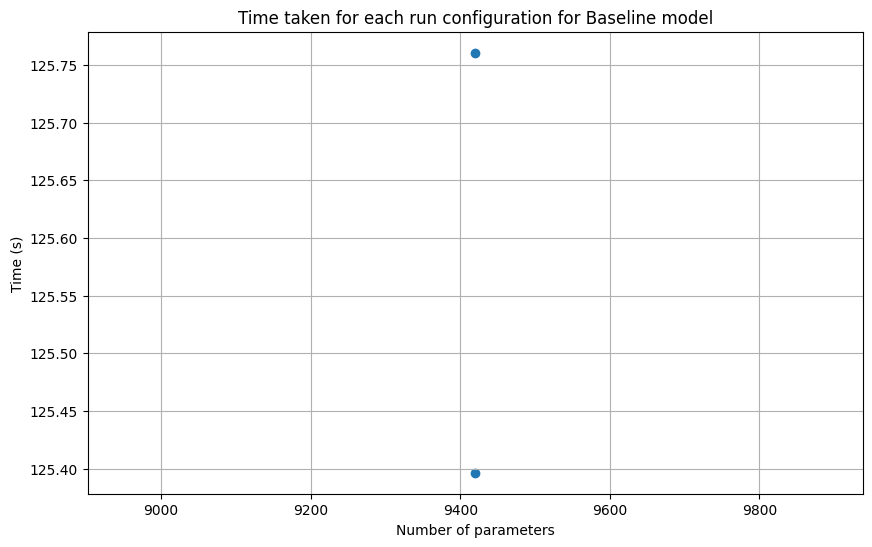

In [ ]:
# plot number of parameters vs time
plt.figure(figsize=(10, 6))
plt.scatter(number_of_parameters, time_values)
plt.xlabel("Number of parameters")
plt.ylabel("Time (s)")
plt.title("Time taken for each run configuration for Baseline model")
plt.grid()
plt.show()

In [ ]:
def companion_of_means_with_different_parameters(
    experiment_dict, title_accuracy, title_loss, plot_train=True, plot_test=True
):

    plt.figure(figsize=(10, 6))
    for key, metrics_list in experiment_dict.items():

        hidden_units, lr = key
        train_acc_list = [metrics["train_acc"] for metrics in metrics_list]
        test_acc_list = [metrics["test_acc"] for metrics in metrics_list]
        epochs = len(train_acc_list[0])
        num_of_runs = len(train_acc_list)

        avg_train_loss = np.mean(
            [metrics["train_acc"] for metrics in metrics_list], axis=0
        )
        if plot_train:
            plt.plot(
                range(epochs),
                avg_train_loss,
                label=f"Avg Train Accuracy with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

        avg_test_loss = np.mean(
            [metrics["test_acc"] for metrics in metrics_list], axis=0
        )
        if plot_test:
            plt.plot(
                range(epochs),
                avg_test_loss,
                label=f"Avg Test Accuracy with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

    # Add title, labels, grid, legend
    plt.title(title_accuracy)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()

    plt.figure(figsize=(10, 6))

    for key, metrics_list in experiment_dict.items():
        hidden_units, lr = key
        train_loss_list = [metrics["train_loss"] for metrics in metrics_list]
        test_loss_list = [metrics["test_loss"] for metrics in metrics_list]
        epochs = len(train_loss_list[0])
        num_of_runs = len(train_loss_list)

        avg_train_loss = np.mean(
            [metrics["train_loss"] for metrics in metrics_list], axis=0
        )
        if plot_train:
            plt.plot(
                range(epochs),
                avg_train_loss,
                label=f"Avg Train Loss with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

        avg_test_loss = np.mean(
            [metrics["test_loss"] for metrics in metrics_list], axis=0
        )
        if plot_test:
            plt.plot(
                range(epochs),
                avg_test_loss,
                label=f"Avg Test Loss with {hidden_units} hidden units and learning rate = {lr}",
                linestyle="-",
                linewidth=4,
            )

    # Add title, labels, grid, legend
    plt.title(title_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc="best")
    plt.grid(True)

    plt.show()

In [38]:
test_dict = {}
for key, value in experiment_dict.items():
    if isinstance(value, tuple):
        test_dict[key] = value[0]

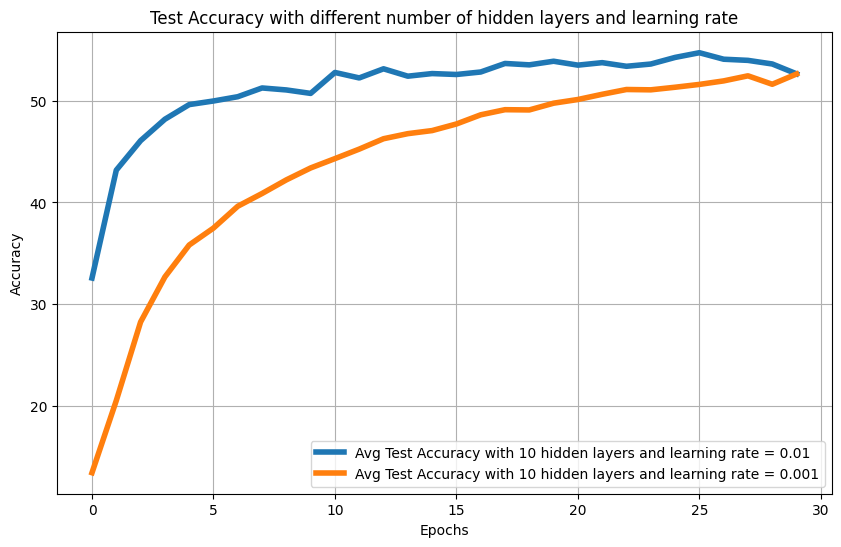

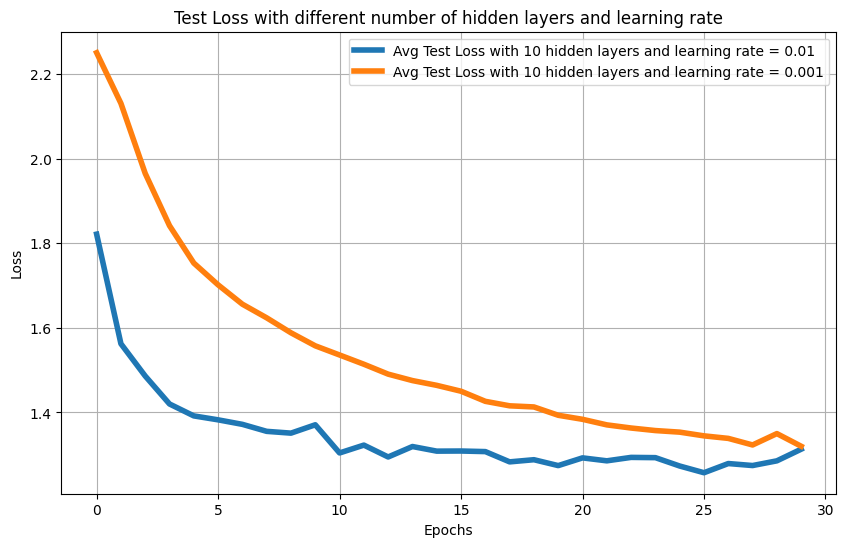

In [ ]:
companion_of_means_with_different_parameters(
    test_dict,
    title_accuracy="Test Accuracy with different number of hidden units and learning rate",
    title_loss="Test Loss with different number of hidden units and learning rate",
    plot_train=False,
    plot_test=True,
)

In [8]:
experiment_dict = pickle.load(open("../results/enhanced_model_time.pkl", "rb"))

for key, value in experiment_dict.items():
    print(f"key: {key}, value: {value}")

key: experiment name, value: enhanced_model_time
key: experiments metadata, value: 
key: (0.75, 0.001), value: ([{'train_loss': [1.5196161270141602, 1.182251214981079, 0.9754809141159058, 0.8800280690193176, 0.8131123781204224, 0.7571289539337158, 0.7155767679214478, 0.6824958324432373, 0.6512030959129333, 0.6249809861183167, 0.6064891219139099, 0.5765344500541687, 0.5595987439155579, 0.5394887924194336, 0.5223294496536255, 0.5075269937515259, 0.48913371562957764, 0.47473475337028503, 0.4638861417770386, 0.4542595148086548, 0.4418449103832245, 0.432911217212677, 0.42231595516204834, 0.4147377610206604, 0.40229400992393494, 0.40164265036582947, 0.3921394348144531, 0.38334938883781433, 0.37843450903892517, 0.37141191959381104], 'train_acc': [44.246401918976545, 56.97850035536603, 64.95202558635394, 68.52567519545131, 71.08875266524521, 73.0299395877754, 74.48694029850746, 75.5763592750533, 76.9589552238806, 77.75297619047619, 78.25159914712154, 79.57422707889125, 80.11282871357498, 80.74